In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn 

In [2]:
df = pd.read_csv(r"./garments_worker_productivity.csv")
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [4]:
nanwip = df[df['wip'].isnull()]
nanwip['department'].unique()

array(['finishing ', 'finishing'], dtype=object)

In [5]:
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [6]:
df['department'] = df['department'].str.strip()

In [7]:
df['department'].unique()

array(['sweing', 'finishing'], dtype=object)

In [8]:
df[(df['department']=='finishing') & (df['wip'].notnull())]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity


we can see that the finishinf department no usa work in progress(wip) so it would be unnecessary to fill the nan values here with data manipulation, so we will asume it´s 0

In [9]:
df['wip'] = df['wip'].fillna(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

*correlation for targeted productivity and actual productivity*

<Axes: >

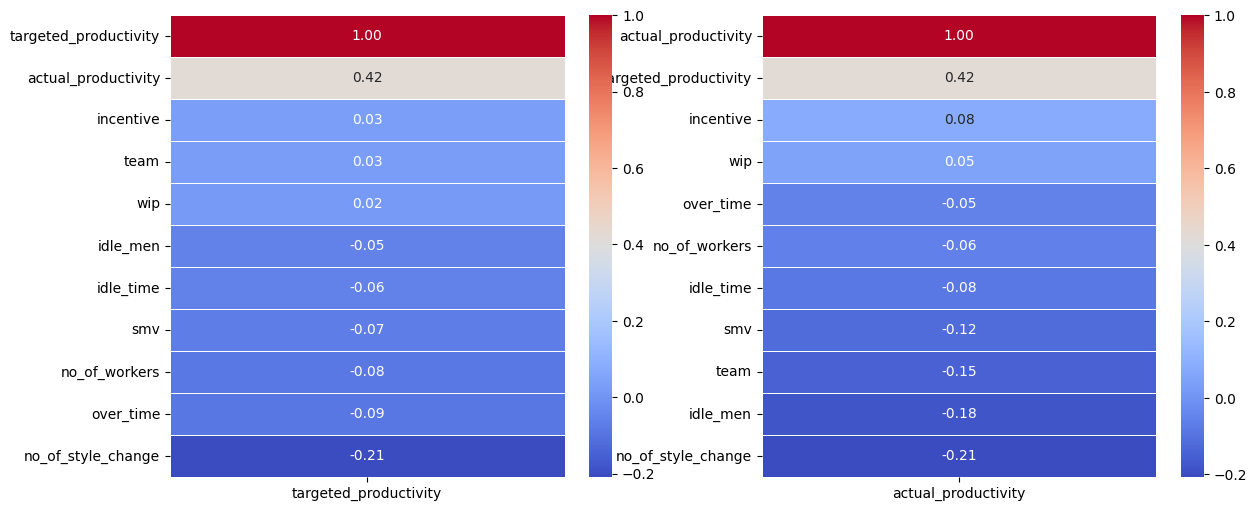

In [11]:
df_numeric = df.select_dtypes(exclude=['object'])
corr_targeted = df_numeric.corr()[['targeted_productivity']].sort_values(by='targeted_productivity', ascending=False)
corr_actual = df_numeric.corr()[['actual_productivity']].sort_values(by='actual_productivity', ascending=False)
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) 
sn.heatmap(corr_targeted, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[0])
sn.heatmap(corr_actual, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[1])

<h2>Insights</h2>

*Frequent changes disrupt productivity goals and actual output 

*Increasing overtime, idle time, or workers does not necessarily improve productivity 

*Higher standard minute value values negatively impact actual productivity more than planned expectations. 


Let's see the productivity for each team

In [12]:
team_prod = df.groupby('team')['actual_productivity'].mean()
team_prod.sort_values( axis=0, ascending=True, inplace=False)

team
7     0.668006
8     0.674148
11    0.681985
6     0.685385
5     0.697981
10    0.719736
9     0.734462
4     0.770035
2     0.770855
12    0.779055
3     0.803880
1     0.821054
Name: actual_productivity, dtype: float64

In [13]:
team_tprod = df.groupby('team')['targeted_productivity'].mean()
team_tprod.sort_values( axis=0, ascending=True, inplace=False)

team
5     0.673656
11    0.703977
8     0.708257
7     0.714271
4     0.717619
6     0.731383
10    0.738500
2     0.739908
3     0.742105
1     0.746667
9     0.758173
12    0.774242
Name: targeted_productivity, dtype: float64

are teams formed just by portiions of the same department?

In [14]:
df[df['team']==7]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
16,1/1/2015,Quarter1,finishing,Thursday,7,0.80,2.90,0.0,960,0,0.0,0,0,8.0,0.540729
31,1/3/2015,Quarter1,sweing,Saturday,7,0.80,25.90,1138.0,6720,38,0.0,0,0,56.0,0.800125
39,1/3/2015,Quarter1,finishing,Saturday,7,0.80,3.94,0.0,960,0,0.0,0,0,8.0,0.625313
46,1/4/2015,Quarter1,sweing,Sunday,7,0.80,25.90,1227.0,7020,60,0.0,0,0,56.5,0.850436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,3/9/2015,Quarter2,sweing,Monday,7,0.50,30.48,1161.0,6600,0,0.0,0,1,55.0,0.500611
1169,3/10/2015,Quarter2,sweing,Tuesday,7,0.60,30.48,1017.0,6840,25,0.0,0,1,57.0,0.630403
1171,3/10/2015,Quarter2,finishing,Tuesday,7,0.50,3.90,0.0,960,0,0.0,0,0,8.0,0.560625
1191,3/11/2015,Quarter2,sweing,Wednesday,7,0.65,30.48,935.0,6840,26,0.0,0,1,57.0,0.650596


clearly we can see that that is not the case

In [15]:
df_prod = pd.DataFrame({'Targeted': team_tprod, 'Actual': team_prod}).sort_index()
x = np.arange(len(df.index))
width = 0.4
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, df['Targeted'], width=width, label="Targeted Productivity", color='red', alpha=0.7)
plt.bar(x + width/2, df['Actual'], width=width, label="Actual Productivity", color='blue', alpha=0.7)

plt.xticks(x, df.index)
plt.xlabel("Team")
plt.ylabel("Productivity")
plt.title("Targeted vs Actual Productivity by Team")
plt.legend()
plt.show()

KeyError: 'Targeted'

<Figure size 1000x600 with 0 Axes>

Text(0, 0.5, 'Productivity difference with target')

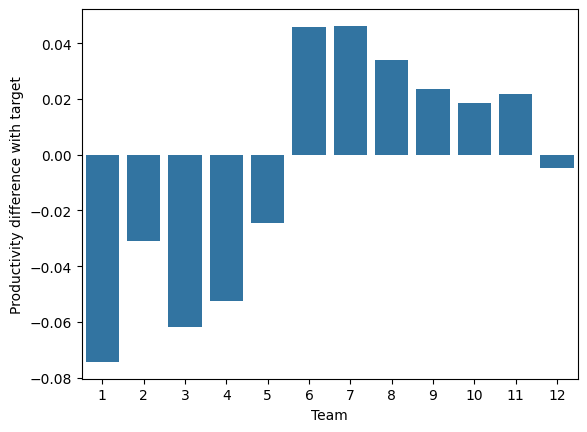

In [ ]:
dif = team_tprod-team_prod

sn.barplot(dif)
plt.xlabel("Team")
plt.ylabel("Productivity difference with target")

We can see that half of the teams exceed the targeted productivity, whilst the other half was below, why?    

In [16]:
df.groupby('team')[['actual_productivity', 'idle_time', 'no_of_style_change', 'over_time']].mean()

,actual_productivity,idle_time,no_of_style_change,over_time
team,,,,
1,0.821054,0.000000,0.057143,4793.428571
2,0.770855,0.059633,0.155963,4384.954128
3,0.803880,0.000000,0.263158,5375.684211
4,0.770035,1.428571,0.200000,5449.714286
5,0.697981,1.053763,0.086022,5330.967742
6,0.685385,0.000000,0.074468,3369.095745
7,0.668006,2.979167,0.208333,4857.187500
8,0.674148,2.876147,0.266055,4312.293578
9,0.734462,0.000000,0.105769,4519.038462


here we can see the comparison between high and low  performance teams :

In [23]:
avg_productivity = df_numeric['actual_productivity'].mean()
high_perf = df_numeric[df_numeric['actual_productivity'] > avg_productivity]
low_perf = df_numeric[df_numeric['actual_productivity'] <= avg_productivity]

print("Promedio de variables en equipos de ALTA productividad:")
print(high_perf.mean())

print("\nPromedio de variables en equipos de BAJA productividad:")
print(low_perf.mean())


Promedio de variables en equipos de ALTA productividad:
team                        6.132780
targeted_productivity       0.761411
smv                        14.469668
wip                       760.441217
over_time                4550.567082
incentive                  50.625173
idle_time                   0.004841
idle_men                    0.020747
no_of_style_change          0.069156
no_of_workers              34.364454
actual_productivity         0.847151
dtype: float64

Promedio de variables en equipos de BAJA productividad:
team                        6.875527
targeted_productivity       0.681160
smv                        15.965928
wip                       575.554852
over_time                4593.227848
incentive                  19.274262
idle_time                   1.836498
idle_men                    0.900844
no_of_style_change          0.274262
no_of_workers              34.984177
actual_productivity         0.564164
dtype: float64


- **High Productivity Teams** have a higher actual productivity (*0.85 vs. 0.56*), indicating better operational efficiency. They exhibit:
  - **Lower idle time** (*0.0048 vs. 1.83*) and fewer inactive workers.
  - **Fewer style changes** (*0.07 vs. 0.27*), reducing disruptions.
  - **Higher financial incentives** (*50.62 vs. 19.27*), which may enhance worker motivation.

- **Low Productivity Teams** experience more idle time, frequent style changes, and lower incentives, which could negatively impact their performance.